w= [[ 6.24500451e-17  6.24500451e-17 -3.33284735e-01]]
b= [1.66637508]


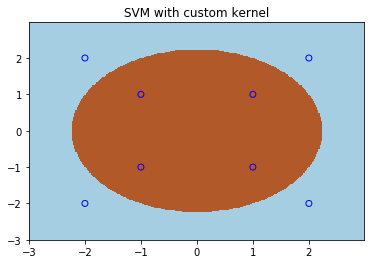

In [14]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

def image(x):
    x = np.asarray(x)
    a = []
    for i in range(x.shape[0]):
        a.append(np.hstack((x[i],x[i]@x[i].T)))
    return np.asarray(a)

x = [[1,1],[1,-1],[-1,1],[-1,-1],[2,2],[2,-2],[-2,2],[-2,-2]]
y = [1,1,1,1,-1,-1,-1,-1]

h = .02  # step size in the mesh

clf = svm.SVC(kernel = 'linear',C=1)
x1 = image(x)
clf.fit(x1,y)
m = clf.get_params(deep=True)
w = clf.coef_
b = clf.intercept_

print("w=",w)
print("b=",b)

x = np.asarray(x)
y = np.asarray(y)
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
coord2D = np.c_[xx.ravel(), yy.ravel()]
coord3D = image(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(coord3D)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='b')
plt.title('SVM with custom kernel')
plt.axis('tight')
plt.show()
